### Transforming a term-document matrix using TF-IDF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
Data = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/term-doc-mat.csv", header = None)
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,database,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,index,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,likelihood,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,linear,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,matrix,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,query,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,regression,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,retrieval,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,sql,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,vector,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [3]:
TD = Data.iloc[:, 1:] # Remove the column containing the terms
TD

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [4]:
TD.columns= range(15) # Reindex the columns to start from 0
TD

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [5]:
# Compute term frequenices
termFreqs = TD.sum(axis = 1)
termFreqs

0    133
1     99
2     61
3    114
4     90
5     84
6    123
7     62
8     86
9    129
dtype: int64

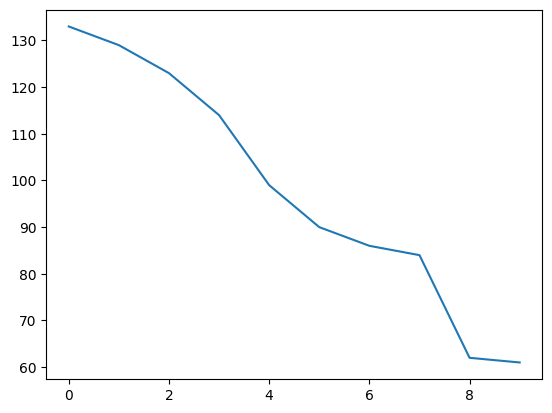

In [6]:
# Plot the distribution
plt.plot(sorted(termFreqs, reverse = True))
plt.show()

In [7]:
# Calculate document frequency for a term 't'
DF = pd.DataFrame([(TD != 0).sum(1)]).T
DF

,0
0,10
1,11
2,8
3,10
4,9
5,8
6,5
7,9
8,6
9,12


In [8]:
# Create a matrix with all entries
NDocs = TD.shape[1]
NMatrix = np.ones(np.shape(TD), dtype = float) * NDocs
np.set_printoptions(precision = 2, suppress = True, linewidth = 120)
print(NMatrix)

[[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]]


In [9]:
# Convert each entry into IDF values
IDF = np.log2(np.divide(NMatrix, np.array(DF)))
print(IDF)

[[0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32]
 [0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32]]


In [10]:
# Compute the TF-IDF matrix
pd.set_option("display.precision", 2)
TD_tfidf = TD * IDF
TD_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,14.04,18.72,7.02,3.51,25.15,1.17,0.00,1.75,0.58,3.51,2.34,0.00,0.00,0.00,0.00
1,4.03,2.24,2.24,0.89,8.95,0.00,0.45,0.00,0.00,0.00,12.08,6.26,1.34,0.89,4.92
2,0.00,2.72,0.00,0.00,2.72,6.35,10.88,3.63,24.49,3.63,0.00,0.91,0.00,0.00,0.00
3,1.75,0.00,0.00,0.00,0.00,9.36,0.00,1.17,14.62,13.45,4.09,7.02,12.28,1.75,1.17
4,0.74,0.00,0.00,0.00,0.00,24.32,1.47,0.00,5.16,8.84,10.32,3.68,8.84,2.95,0.00
5,10.88,1.81,0.00,0.00,24.49,0.00,0.00,0.00,0.00,19.95,8.16,3.63,0.00,4.53,2.72
6,0.00,0.00,0.00,0.00,0.00,28.53,50.72,34.87,53.89,26.94,0.00,0.00,0.00,0.00,0.00
7,0.74,0.00,0.00,0.00,1.47,0.00,0.00,0.00,2.21,6.63,19.90,5.16,3.68,2.95,2.95
8,27.76,13.22,21.15,9.25,40.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.00
9,0.64,0.00,0.00,0.64,0.00,8.69,1.29,0.64,3.54,2.58,10.62,5.15,4.51,2.25,0.97


### Identify the documents most similar to a specified query with the KNN algorithm with TF-IDF weighted document vectors

In [11]:
def knn_search(x, D, K, measure):

    """
    Find K nearest neighbors of an instance x among the instances in D.
     
    Parameters:
    x : array-like
        The instance for which one wants to find neighbors.
    D : array-like
        The dataset containing instances to search through.
    K : int
        The number of nearest neighbors to return.
    measure : int
        Distance measure to use (0 for Euclidean Distance, 1 for Cosine Similarity).
          
    Returns:
    tuple:
        A tuple containing the indices of the K nearest neighbors and their distances.         
    """
    
    if measure == 0: 
        dists = np.sqrt(((D - x) ** 2).sum(axis = 1)) # Calculate Euclidean Distance

    elif measure == 1: 
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))]) # Compute the norms of each instance in D
        x_norm = np.linalg.norm(x) # Compute the norm of the instance x
        sims = np.dot(D, x) / (D_norm * x_norm) # Calculate Cosine Similarity
        dists = 1 - sims # Convert Cosine Similarity to distance
    
    # Get the indices of the sorted distances
    idx = np.argsort(dists)

    return idx[:K], dists

In [12]:
# Multiply each term frequency in the query vector x by the corresponding IDF value
x = np.array([3, 22, 0, 17, 9, 6, 1, 12, 0, 22])
x_tfidf = x * IDF.T[0]
print(x_tfidf)

[1.75 9.84 0.   9.94 6.63 5.44 1.58 8.84 0.   7.08]


In [13]:
# Finding the k = 5 nearest neighbors using inverse of Cosine similarity
DT_tfidf = TD_tfidf.T # Transpose to get a document x term matrix
DT_array = np.array(DT_tfidf) # Convert the transposed matrix to a numpy array
neigh_idx, distances = knn_search(x_tfidf, DT_array, 5, 1)
distances = pd.Series(distances, index = DT_tfidf.index)
distances.sort_values()

11    0.01
10    0.10
14    0.18
13    0.20
12    0.21
9     0.44
5     0.55
4     0.75
8     0.75
0     0.77
1     0.86
7     0.89
6     0.90
3     0.90
2     0.92
dtype: float64

In [14]:
print("Query:")
print(x)
print("\nNeighbors:")
DT_tfidf.iloc[neigh_idx]

Query:
[ 3 22  0 17  9  6  1 12  0 22]

Neighbors:


,0,1,2,3,4,5,6,7,8,9
11,0.00,6.26,0.91,7.02,3.68,3.63,0.0,5.16,0.00,5.15
10,2.34,12.08,0.00,4.09,10.32,8.16,0.0,19.90,0.00,10.62
14,0.00,4.92,0.00,1.17,0.00,2.72,0.0,2.95,0.00,0.97
13,0.00,0.89,0.00,1.75,2.95,4.53,0.0,2.95,1.32,2.25
12,0.00,1.34,0.00,12.28,8.84,0.00,0.0,3.68,0.00,4.51


### Extend the example to classification using the KNN approach

In [15]:
# Add labels to original data
cat_labels = np.array(["Databases", "Databases", "Databases",
                       "Databases", "Databases", "Regression",
                       "Regression", "Regression", "Regression",
                       "Regression", "Information Retrieval",
                       "Information Retrieval", "Information Retrieval",
                       "Information Retrieval", "Information Retrieval"])
cat_labels = pd.Series(cat_labels, index = DT_tfidf.index)
DT_tfidf["Category"] = cat_labels
DT_tfidf

,0,1,2,3,4,5,6,7,8,9,Category
0,14.04,4.03,0.00,1.75,0.74,10.88,0.00,0.74,27.76,0.64,Databases
1,18.72,2.24,2.72,0.00,0.00,1.81,0.00,0.00,13.22,0.00,Databases
2,7.02,2.24,0.00,0.00,0.00,0.00,0.00,0.00,21.15,0.00,Databases
3,3.51,0.89,0.00,0.00,0.00,0.00,0.00,0.00,9.25,0.64,Databases
4,25.15,8.95,2.72,0.00,0.00,24.49,0.00,1.47,40.98,0.00,Databases
5,1.17,0.00,6.35,9.36,24.32,0.00,28.53,0.00,0.00,8.69,Regression
6,0.00,0.45,10.88,0.00,1.47,0.00,50.72,0.00,0.00,1.29,Regression
7,1.75,0.00,3.63,1.17,0.00,0.00,34.87,0.00,0.00,0.64,Regression
8,0.58,0.00,24.49,14.62,5.16,0.00,53.89,2.21,0.00,3.54,Regression
9,3.51,0.00,3.63,13.45,8.84,19.95,26.94,6.63,0.00,2.58,Regression


In [16]:
def knn_classify(x, D, K, labels, measure):
    
    neigh_idx, distances = knn_search(x, D, K, measure) # Find the indices and distances of the K nearest neighbors
    neigh_labels = labels[neigh_idx] # Get the labels of the nearest neighbors
    count = Counter(neigh_labels) # Count occurrences of each label among the neighbors
    
    print("Labels for top", K, "neighbors:", count.most_common())
    
    return count.most_common(1)[0][0]

In [17]:
print("Instance to classify:")
print(x)
print("Predicted Category for the new instance: ", knn_classify(x_tfidf, DT_array, 5, cat_labels, 1))

Instance to classify:
[ 3 22  0 17  9  6  1 12  0 22]
Labels for top 5 neighbors: [('Information Retrieval', 5)]
Predicted Category for the new instance:  Information Retrieval
